In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
train_annotation = pd.read_csv(r"E:\ras\Sign Language.v1i.tensorflow\train\_annotations.csv")
train_annotation

,filename,width,height,class,xmin,ymin,xmax,ymax
0,A26_jpg.rf.6366d535f7ef905c73c14ee44625be56.jpg,380,380,A,72,99,322,342
1,A27_jpg.rf.f6fffd5a83ad3155284ba4eab4dc7f48.jpg,384,384,A,41,67,259,246
2,A25_jpg.rf.b5c1fd24bffe542f74923bd44773bfe3.jpg,378,378,A,89,97,339,288
3,A25_jpg.rf.935964a43bc2a667487f4bc196da2285.jpg,396,396,A,41,93,294,286
4,A27_jpg.rf.f8dfda0f3096f2742590d2401e18ea3a.jpg,400,400,A,52,78,264,253
...,...,...,...,...,...,...,...,...
1508,Z25_jpg.rf.4276a5f9e16aff6b0c5ae9cd0f12b687.jpg,380,380,S,135,172,272,273
1509,Z5_jpg.rf.029fd26cf14d515dc191f6a0a840c2d7.jpg,402,402,S,213,159,381,306
1510,Z7_jpg.rf.98e9646f38358693baf2f46067ba8a20.jpg,406,406,S,220,238,395,377
1511,Z5_jpg.rf.9ecc7289e0413ded9005529b3140adc2.jpg,392,392,S,223,179,386,319


In [3]:
start_fn ="E:/ras/Sign Language.v1i.tensorflow/train/"
train_annotation['filename']= [start_fn+ n for n in train_annotation['filename']]
train_annotation.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,E:/ras/Sign Language.v1i.tensorflow/train/A26_...,380,380,A,72,99,322,342
1,E:/ras/Sign Language.v1i.tensorflow/train/A27_...,384,384,A,41,67,259,246
2,E:/ras/Sign Language.v1i.tensorflow/train/A25_...,378,378,A,89,97,339,288
3,E:/ras/Sign Language.v1i.tensorflow/train/A25_...,396,396,A,41,93,294,286
4,E:/ras/Sign Language.v1i.tensorflow/train/A27_...,400,400,A,52,78,264,253


In [6]:
train_annotation['class'][1380]

'N'

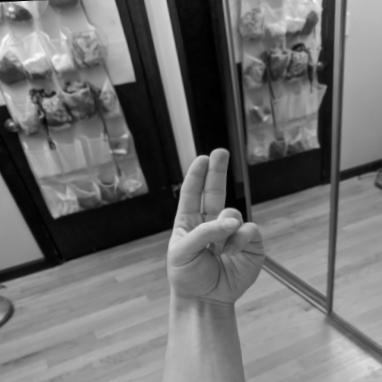

In [7]:
# Confirmantion that the images are in their correct filepath thus can be loaded
from IPython.display import Image
Image(train_annotation['filename'][1380])


In [8]:
train_annotation= train_annotation.sample(frac=1, ignore_index=True)
train_annotation

,filename,width,height,class,xmin,ymin,xmax,ymax
0,E:/ras/Sign Language.v1i.tensorflow/train/X23_...,388,388,Q,139,118,318,308
1,E:/ras/Sign Language.v1i.tensorflow/train/K7_j...,380,380,C,82,144,213,316
2,E:/ras/Sign Language.v1i.tensorflow/train/D10_...,396,396,T,3,46,248,319
3,E:/ras/Sign Language.v1i.tensorflow/train/U14_...,412,412,N,142,153,300,373
4,E:/ras/Sign Language.v1i.tensorflow/train/V19_...,394,394,O,181,12,327,212
...,...,...,...,...,...,...,...,...
1508,E:/ras/Sign Language.v1i.tensorflow/train/A17_...,388,388,A,123,128,321,277
1509,E:/ras/Sign Language.v1i.tensorflow/train/Z7_j...,406,406,S,220,238,395,377
1510,E:/ras/Sign Language.v1i.tensorflow/train/O27_...,388,388,G,108,118,315,309
1511,E:/ras/Sign Language.v1i.tensorflow/train/M22_...,372,372,E,100,94,247,233


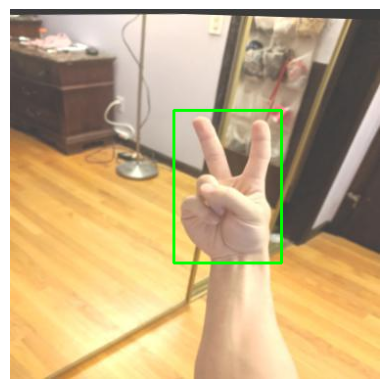

In [ ]:
import cv2

def show_image(image_path, boxes):
    image = cv2.imread(image_path)
    for box in boxes:
        xtl, ytl, xbr, ybr = box
        cv2.rectangle(image, (int(xtl), int(ytl)), (int(xbr), int(ybr)), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

image_filename = train_annotation['filename'][1090]

image_boxes = train_annotation[train_annotation['filename'] == image_filename][['xmin', 'ymin', 'xmax', 'ymax']].values.tolist()

show_image(image_filename, image_boxes)

# Impelement padding to avoid image distortion while resizing and scalig

In [13]:
const =480
pad_x=[]
pad_y=[]
scaling=[]
for idx, row in train_annotation.iterrows():
    scaling_factor= min(const/row['width'], const/row['height'])
    scaling.append(scaling_factor)
    scaled_width =row['width'] *scaling_factor
    scaled_height =row['height'] *scaling_factor
    pad_x.append((scaled_width - row['width'])/2)
    pad_y.append((scaled_height - row['height'])/2)

train_annotation['pad_x']= pad_x
train_annotation['pad_y']= pad_y
train_annotation['scaling']= scaling
train_annotation

,filename,width,height,class,xmin,ymin,xmax,ymax,pad_x,pad_y,scaling
0,E:/ras/Sign Language.v1i.tensorflow/train/X23_...,388,388,Q,139,118,318,308,46.0,46.0,1.237113
1,E:/ras/Sign Language.v1i.tensorflow/train/K7_j...,380,380,C,82,144,213,316,50.0,50.0,1.263158
2,E:/ras/Sign Language.v1i.tensorflow/train/D10_...,396,396,T,3,46,248,319,42.0,42.0,1.212121
3,E:/ras/Sign Language.v1i.tensorflow/train/U14_...,412,412,N,142,153,300,373,34.0,34.0,1.165049
4,E:/ras/Sign Language.v1i.tensorflow/train/V19_...,394,394,O,181,12,327,212,43.0,43.0,1.218274
...,...,...,...,...,...,...,...,...,...,...,...
1508,E:/ras/Sign Language.v1i.tensorflow/train/A17_...,388,388,A,123,128,321,277,46.0,46.0,1.237113
1509,E:/ras/Sign Language.v1i.tensorflow/train/Z7_j...,406,406,S,220,238,395,377,37.0,37.0,1.182266
1510,E:/ras/Sign Language.v1i.tensorflow/train/O27_...,388,388,G,108,118,315,309,46.0,46.0,1.237113
1511,E:/ras/Sign Language.v1i.tensorflow/train/M22_...,372,372,E,100,94,247,233,54.0,54.0,1.290323


In [14]:
train_annotation.columns

Index(['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax',
       'pad_x', 'pad_y', 'scaling'],
      dtype='object')

In [ ]:
# xmin = xtl (x-coordinate of top-left corner)

# ymin = ytl (y-coordinate of top-left corner)

# xmax = xbr (x-coordinate of bottom-right corner)

# ymax = ybr (y-coordinate of bottom-right corner)

# Applying padding on the bboxes

In [15]:
boxes=[]
for idx, row  in train_annotation.iterrows():
    x_min = (row['xmin']*row['scaling'] +row['pad_x'])
    x_max = (row['xmax']*row['scaling'] +row['pad_x'])
    y_min = (row['ymin']*row['scaling'] +row['pad_y'])
    y_max = (row['ymax']*row['scaling'] +row['pad_y'])
    bounding_box = [round(x_min/const,3), round(y_min/const,3), round(x_max/const,3), round(y_max/const,3)]
    boxes.append(bounding_box)

train_annotation['bbox'] =boxes

# Sort images labels


In [22]:
labels = train_annotation['class'].to_numpy()
unique_labels = np.unique(labels)
all_labels=[label == unique_labels for label in labels]
all_labels[:10]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False]),
 array([False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False,
        False, False, Fals

In [33]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
x= train_annotation['filename']
y= all_labels
bbox = train_annotation['bbox'].to_list()
x_train,x_test, y_train,y_test,box_train,box_test= train_test_split(
    x,y,bbox,train_size=0.8,random_state=42
)


In [25]:
import pickle
with open ("unique_labels.plk", "wb") as f:
    pickle.dump(unique_labels,f)

In [29]:
import tensorflow as tf


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\birge\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\birge\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\birge\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

In [27]:
def process_image(filepath):
    image = tf.io.read_file(filepath)
    image = tf.image.decode_jpeg(image, channels=3)
    image= tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, (480, 480))
    return image

In [28]:
def get_image_labe_bbox(filepath,label, bbox):
    box_b = tf.convert_to_tensor(bbox)
    image = process_image(filepath)
    return image ,(label, box_b)

In [30]:
def create_batch(x,y=None,bbox_=None,validation_data=False,test_data=False):
    batch_size=32
    if test_data:
        print("Creating testing data batches.....")
        data= tf.data.Dataset.from_tensor_slices((tf.constant(x)))
        data= data.map(process_image).batch(batch_size)
        return data
    elif validation_data:
        print("Creating validation data batches.....")
        data= tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y),tf.cast(bbox_,dtype=tf.float32)))
        data= data.map(get_image_labe_bbox).batch(batch_size)
        return data
    else:
        print("Creating training data batches.....")
        data= tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y),tf.cast(bbox_,dtype=tf.float32)))
        data= data.shuffle(buffer_size=len(x))
        data= data.map(get_image_labe_bbox).batch(batch_size)
        return data


In [34]:
train_data= create_batch(x_train,y_train,box_train)
val_data = create_batch(x_test,y_test,box_test,validation_data=True)

Creating training data batches.....


NameError: name 'tf' is not defined

In [35]:
train_data.element_spec, val_data.element_spec

NameError: name 'train_data' is not defined

In [36]:
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten, Input,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import keras

input_shape=[480,480,3]


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\birge\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\birge\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\birge\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

In [ ]:
inputs= Input(shape=input_shape)
x=Conv2D(32,(3,3),name='bl_1',activation='relu')(inputs)
x=MaxPooling2D((2,2),name='bl_2')(x)
x=Conv2D(84,(3,3),name='bl_3',activation='relu')(x)
x=MaxPooling2D((4,4),name='bl_4')(x)
x=Conv2D(128,(3,3),name='bl_5',activation='relu')(x)
x=MaxPooling2D((4,4),name='bl_6')(x)

x=Flatten(name='bl_7')(x)


# Output layers for classification 
class_output=Dense(64,activation='relu',name='cd')(x)
class_output= Dense(len(unique_labels),activation='softmax',name='cd_head')(class_output)

# Output layer for bounding box regression
bbox_output=Dense(64,activation='relu',name='bb_1')(x)
bbox_output=Dense(32,activation='relu',name='bb_2')(bbox_output)
bbox_output=Dense(16,activation='relu',name='bb_3')(bbox_output)
bbox_output=Dense(4,activation='sigmoid',name='bb_head')(bbox_output)

model=Model(inputs=inputs, outputs=[class_output,bbox_output])
model.compile(
    optimizer=Adam(),
    loss={'cd_head': keras.losses.CategoricalCrossentropy(),'bb_head': keras.losses.MeanAbsoluteError()},
    metrics={'cd_head':'accuracy','bb_head':'mae'},
)
model.summary()

In [ ]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='cd_head_accuracy',
    patience=3,
    mode='max',
    restore_best_weights=True
)

checkpoint = keras.callbacks.ModelCheckpoint(
    'best_model.keras',
    monitor='val_class_output_accuracy',
    mode='max',
    save_best_only=True
)


In [ ]:
model.fit(
    x=train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stop, checkpoint]
)


In [ ]:
model.save('sign_lang.keras')

In [37]:
import tensorflow as tf


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\birge\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\birge\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\birge\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import